In [2]:
library(edgeR)
library(magrittr)
library(ggplot2)
#library(DESeq2)
library(MAST)
library(tidyr)
library(dplyr)
library(reshape)
library(Seurat)
#library(SeuratDisk)
require(scales)
library(gplots)
library(reshape2)
library(sceasy)
library(reticulate)

In [2]:
h5ad_file <- "/lustre/scratch117/cellgen/team205/rl20/CTCL/object-new/CTCL_tumourcell_sanger_PKU_Vienna_raw_rmdou.h5ad"

sceasy::convertFormat(h5ad_file, from="anndata", to="seurat",
                      outFile='/lustre/scratch117/cellgen/team205/rl20/CTCL/object-new/CTCL_tumourcell_sanger_PKU_Vienna_raw_rmdou.rds')

X -> counts



An object of class Seurat 
16881 features across 92475 samples within 1 assay 
Active assay: RNA (16881 features, 0 variable features)

In [3]:
pseudobulk <- function(seurat_object, column, label){
    seurat_object@meta.data[,column] <- as.character(seurat_object@meta.data[,column])
    tmp <- seurat_object[,seurat_object@meta.data[,column]==label]
    tmp2 <- Matrix::rowSums(tmp@assays$RNA@counts)
    return(tmp2)
}

### column -- donor_id
### label -- each donor

In [35]:
Target_subset <- readRDS("/lustre/scratch117/cellgen/team205/rl20/CTCL/object-new/CTCL_tumourcell_sanger_PKU_Vienna_raw_rmdou.rds")

In [36]:
meta <- read.csv('/lustre/scratch117/cellgen/team205/rl20/CTCL/object-new/CTCL_tumourcell_sanger_PKU_Vienna_raw_rmdou_meta.csv')
head(meta)

,donor_id,sample_type,nCount_RNA,nFeature_RNA,sample_id,mad_prd,Status,Site,Tissue,Enrichment,⋯,mad_MAD,mad_thr,batch,integrated_sample_id,broad_cell_type,LR_pre_pre,LR_pre_post,type,sample,dataset
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AAACCCAGTCCGTTTC-1-PKU,MF14_v3,MF_CD8,974,558,,nan,NaN,NaN,,NaN,⋯,NA,NA,NA,,,,,,,PKU
AAACGAAAGCATTTCG-1-PKU,MF14_v3,MF_CD8,18963,3881,,nan,NaN,NaN,,NaN,⋯,NA,NA,NA,,,,,,,PKU
AAACGAAAGCGGTATG-1-PKU,MF14_v3,MF_CD8,6899,2118,,nan,NaN,NaN,,NaN,⋯,NA,NA,NA,,,,,,,PKU
AAACGCTCAATCGAAA-1-PKU,MF14_v3,MF_CD8,9121,2229,,nan,NaN,NaN,,NaN,⋯,NA,NA,NA,,,,,,,PKU
AAACGCTTCGAACCTA-1-PKU,MF14_v3,MF_CD8,11343,2866,,nan,NaN,NaN,,NaN,⋯,NA,NA,NA,,,,,,,PKU
AAAGGATAGATGACAT-1-PKU,MF14_v3,MF_CD8,7630,2186,,nan,NaN,NaN,,NaN,⋯,NA,NA,NA,,,,,,,PKU


In [37]:
Target_subset@meta.data <- meta

In [38]:
table(Target_subset$donor_id)


         CTCL1          CTCL2          CTCL3          CTCL4          CTCL5 
          8230           1900           9168            621           7754 
         CTCL6          CTCL7          CTCL8        MF14_v3        MF15_v3 
          3798           3713           6647            775            773 
          MF17           MF18         MF21-1         MF21-2           MF22 
          3197             32            367           1352            240 
          MF26         MF27-1         MF27-2         MF28-1         MF28-2 
          1412             74             41           7420           2990 
        MF30-1         MF30-2 MF309_followup    MF309_thick     MF309_thin 
           520           1623           6283           3136            742 
MF311_followup    MF311_thick     MF311_thin MF312_followup     MF312_thin 
          3019           4919           6549             34            272 
          P107           P138            P65            P73            P84 
          1

In [39]:
Target_subset$donor_id[which(Target_subset$donor_id == 'MF21-1' |
                             Target_subset$donor_id == 'MF21-2')] <- 'MF21'
Target_subset$donor_id[which(Target_subset$donor_id == 'MF27-1' |
                             Target_subset$donor_id == 'MF27-2')] <- 'MF27'
Target_subset$donor_id[which(Target_subset$donor_id == 'MF28-1' |
                             Target_subset$donor_id == 'MF28-2')] <- 'MF28'
Target_subset$donor_id[which(Target_subset$donor_id == 'MF30-1' |
                             Target_subset$donor_id == 'MF30-2')] <- 'MF30'
Target_subset$donor_id[which(Target_subset$donor_id == 'MF309_followup' |
                             Target_subset$donor_id == 'MF309_thick' |
                             Target_subset$donor_id == 'MF309_thin')] <- 'MF309'
Target_subset$donor_id[which(Target_subset$donor_id == 'MF311_followup' |
                             Target_subset$donor_id == 'MF311_thick' |
                             Target_subset$donor_id == 'MF311_thin')] <- 'MF311'
Target_subset$donor_id[which(Target_subset$donor_id == 'MF312_followup' |
                             Target_subset$donor_id == 'MF312_thick' |
                             Target_subset$donor_id == 'MF312_thin')] <- 'MF312'

In [40]:
table(Target_subset$donor_id)


  CTCL1   CTCL2   CTCL3   CTCL4   CTCL5   CTCL6   CTCL7   CTCL8 MF14_v3 MF15_v3 
   8230    1900    9168     621    7754    3798    3713    6647     775     773 
   MF17    MF18    MF21    MF22    MF26    MF27    MF28    MF30   MF309   MF311 
   3197      32    1719     240    1412     115   10410    2143   10161   14487 
  MF312    P107    P138     P65     P73     P84     P90 
    306    1140     705     814     331    1822      62 

In [41]:
Target_subset$stage <- rep('late', nrow(Target_subset@meta.data))
Target_subset$stage[which(Target_subset$donor_id == 'CTCL2' |
                          Target_subset$donor_id == 'CTCL3' |
                          Target_subset$donor_id == 'CTCL4' |
                          Target_subset$donor_id == 'CTCL6' |
                          Target_subset$donor_id == 'CTCL7' |
                          Target_subset$donor_id == 'CTCL8' |
                          Target_subset$donor_id == 'MF14_v3' |
                          Target_subset$donor_id == 'MF15_v3' |
                          Target_subset$donor_id == 'MF22' |
                          Target_subset$donor_id == 'MF26' |
                          Target_subset$donor_id == 'P65' |
                          Target_subset$donor_id == 'P90' |
                          Target_subset$donor_id == 'P107' |
                          Target_subset$donor_id == 'P138')] <- 'early'

In [42]:
table(Target_subset$stage)


early  late 
31768 60707 

In [43]:
mat <- c()
coln <- c()
for (name in as.vector(sort(unique(Target_subset$donor_id)))) {
     pp <- pseudobulk(Target_subset, 'donor_id', name)
     mat <- cbind(mat, pp)
     coln <- c(coln, name)
} 
colnames(mat) <- coln
rownames(mat) <- rownames(Target_subset@assays$RNA@counts)
#mat <- mat[VariableFeatures(object = Target_subset), ]
dim(mat)

[1] 16881    27

In [44]:
Condition <- "late" #### Physiological conditions

control <- as.vector(unique(Target_subset$donor_id
                            [which(Target_subset$stage != Condition)]))
mut <- as.vector(unique(Target_subset$donor_id
                        [which(Target_subset$stage == Condition)]))
sub <- c(control, mut)
mat_sub <- mat[, sub]
groups <- factor(c(rep(1, length(control)), rep(2, length(mut))))

In [45]:
groups

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
Levels: 1 2

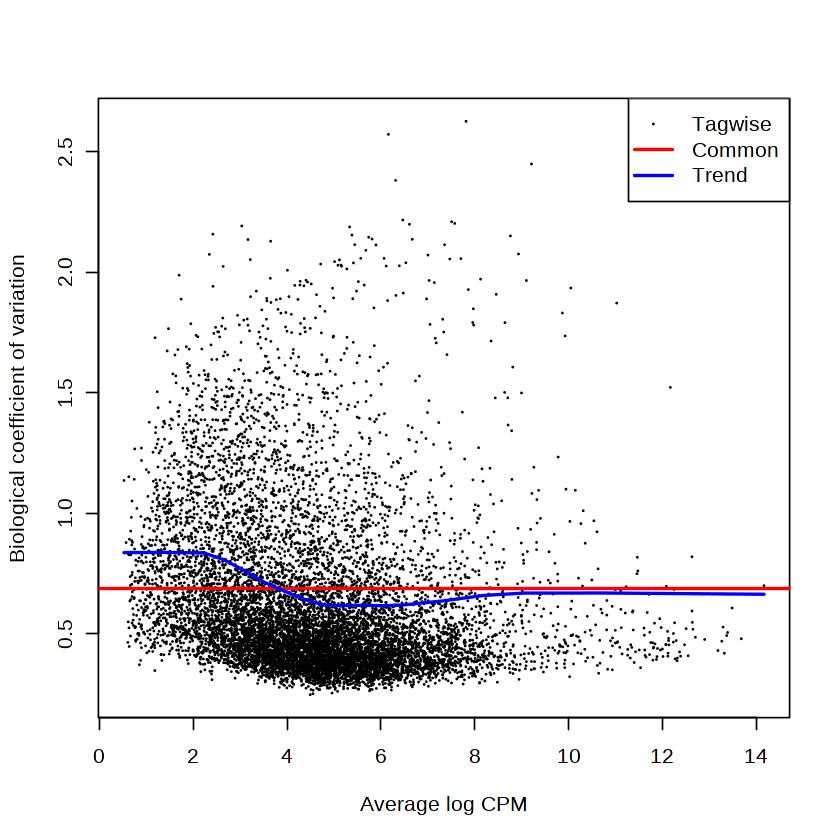

In [46]:
#########edgeR#########
DEGs <- DGEList(counts=mat_sub, group=groups)

#keep <- filterByExpr(DEGs, min.count=10, min.total.count=50)
keep <- filterByExpr(DEGs)
DEGs <- DEGs[keep, , keep.lib.sizes=FALSE]

DEGs <- calcNormFactors(DEGs)

cdr <- scale(colMeans(mat_sub > 0))
#design <- model.matrix(~cdr+groups)
design <- model.matrix(~groups)

DEGs <- estimateDisp(DEGs, design = design)
fit <- glmQLFit(DEGs, design = design)
qlf <- glmQLFTest(fit,coef=2)
tt <- topTags(qlf, n = Inf)
plotBCV(DEGs)

et <- exactTest(DEGs)
et_FDR <- topTags(et, n = nrow(et$table), adjust.method = "BH", sort.by = "PValue", p.value = 1)

out_temp <- et_FDR$table
#colnames(out_temp) <-paste("AD1.1_canonical",colnames(out_temp),sep="_")

In [47]:
#out_temp
edge_mut_up <- out_temp[which(out_temp$FDR<0.1), ]

In [48]:
edge_mut_up

,logFC,logCPM,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>
CCR7,3.473183,6.446184,7.227210e-11,7.582066e-07
SELL,4.663360,5.890110,3.067183e-10,1.080320e-06
CPNE2,5.220393,3.967580,3.089277e-10,1.080320e-06
GNLY,-6.892439,12.167396,1.066799e-09,2.797948e-06
EPHX2,4.262113,5.258581,1.436675e-09,3.014431e-06
ZBED2,-4.761060,5.012013,5.497341e-09,9.612101e-06
MXRA7,-3.063565,4.989314,1.228954e-08,1.841850e-05
C2CD2,2.588803,2.297726,1.409548e-08,1.848446e-05
CHRNA6,4.905220,3.473155,3.104029e-08,3.618263e-05


In [51]:
write.table(edge_mut_up, 
            file='/home/jovyan/farm/CTCL/DEG-condition-psudobulk/DEGs_tumourcell_stage_Sanger_PKU_Vienna.xls',
            quote = F, col.names=T, row.names=T,sep='\t')

#### correction studies/batch

In [52]:
sub

[1] "MF14_v3" "MF15_v3" "MF22"    "MF26"    "CTCL2"   "CTCL3"   "CTCL4"  
 [8] "CTCL6"   "CTCL7"   "CTCL8"   "P107"    "P138"    "P65"     "P90"    
[15] "MF17"    "MF18"    "MF21"    "MF27"    "MF28"    "MF30"    "CTCL1"  
[22] "CTCL5"   "MF309"   "MF311"   "MF312"   "P73"     "P84"

In [53]:
groups <- factor(c(rep(1, length(control)), rep(2, length(mut))))
study <- factor(c(rep('PKU',4),
                  rep('Sanger_Ncl', 6),
                  rep('Vienna',4), 
                  rep('PKU',6),
                  rep('Sanger_Ncl',2),
                  rep('Vienna',5)))

In [54]:
study

[1] PKU        PKU        PKU        PKU        Sanger_Ncl Sanger_Ncl
 [7] Sanger_Ncl Sanger_Ncl Sanger_Ncl Sanger_Ncl Vienna     Vienna    
[13] Vienna     Vienna     PKU        PKU        PKU        PKU       
[19] PKU        PKU        Sanger_Ncl Sanger_Ncl Vienna     Vienna    
[25] Vienna     Vienna     Vienna    
Levels: PKU Sanger_Ncl Vienna

In [55]:
#########edgeR#########
DEGs <- DGEList(counts=mat_sub, group=groups)
DEGs$samples <- cbind(DEGs$samples, study)

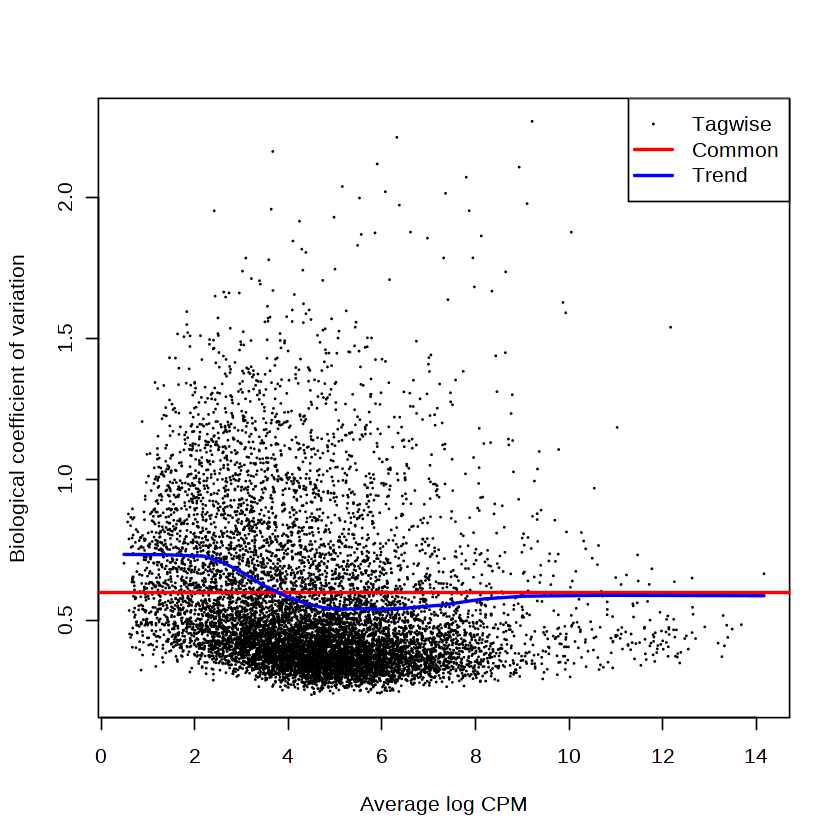

In [56]:
#keep <- filterByExpr(DEGs, min.count=10, min.total.count=50)
keep <- filterByExpr(DEGs)
DEGs <- DEGs[keep, , keep.lib.sizes=FALSE]

DEGs <- calcNormFactors(DEGs)

cdr <- scale(colMeans(mat_sub > 0))
#design <- model.matrix(~cdr+groups)
design <- model.matrix(~study+groups)

DEGs <- estimateDisp(DEGs, design = design)
fit <- glmQLFit(DEGs, design = design)
qlf <- glmQLFTest(fit,coef=2)
tt <- topTags(qlf, n = Inf)
plotBCV(DEGs)

et <- exactTest(DEGs)
et_FDR <- topTags(et, n = nrow(et$table), adjust.method = "BH", sort.by = "PValue", p.value = 1)

out_temp <- et_FDR$table
#colnames(out_temp) <-paste("AD1.1_canonical",colnames(out_temp),sep="_"

In [57]:
edge_mut_up <- out_temp[which(out_temp$FDR<0.1), ]

In [58]:
edge_mut_up

,logFC,logCPM,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>
CCR7,3.473131,6.446888,8.804835e-11,7.435541e-07
SELL,4.662575,5.894072,1.417508e-10,7.435541e-07
CPNE2,5.221015,3.981089,2.664490e-10,9.317721e-07
EPHX2,4.263675,5.267935,6.382196e-10,1.673890e-06
GNLY,-6.892453,12.167520,1.631520e-09,3.423255e-06
CHRNA6,4.886050,3.488848,2.146117e-09,3.752485e-06
IFNAR2,2.010305,4.655017,3.019859e-09,4.525906e-06
NME1-NME2,2.393434,5.261076,4.856377e-09,6.368531e-06
C2CD2,2.592249,2.311638,7.513204e-09,8.757892e-06


In [60]:
write.table(edge_mut_up, 
            file='/home/jovyan/farm/CTCL/DEG-condition-psudobulk/DEGs_tumourcell_stage_Sanger_PKU_Vienna_with_correction_study.xls',
            quote = F, col.names=T, row.names=T, sep='\t')